"""
# Cybersecurity Threat Classification

**Objective**: Classify network threats using machine learning on the UNSW-NB15 dataset.

**Dataset**: UNSW-NB15 (https://research.unsw.edu.au/projects/unsw-nb15-dataset)
- Training set: `UNSW_NB15_training-set.csv`
- Testing set: `UNSW_NB15_testing-set.csv`
"""

# Import required libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, precision_score, 
                            recall_score, f1_score)
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
import warnings
warnings.filterwarnings('ignore')

In [11]:
import os
print("Current working directory:", os.getcwd())
print("Files in this directory:", os.listdir())

Current working directory: C:\Users\shakt\cybersecurity-threat-classification\notebooks
Files in this directory: ['.ipynb_checkpoints', 'CyberThreatClassification.ipynb']


## 1. Data Loading and Initial Exploration

# Load both training and testing datasets

In [13]:
train_df = pd.read_csv('../data/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('../data/UNSW_NB15_testing-set.csv')

# Combine them for complete analysis

In [15]:
df = pd.concat([train_df, test_df], axis=0)


# Display basic info

In [16]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (257673, 45)

First 5 rows:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [61]:
df.isnull().sum()


id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [62]:
df.nunique

<bound method DataFrame.nunique of           id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.121478   tcp       -   FIN      6      4     258     172   
1          2  0.649902   tcp       -   FIN     14     38     734   42014   
2          3  1.623129   tcp       -   FIN      8     16     364   13186   
3          4  1.681642   tcp     ftp   FIN     12     12     628     770   
4          5  0.449454   tcp       -   FIN     10      6     534     268   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_

In [68]:
# Get unique values for each column
for column in df.columns:
    print(f"\nUnique values in {column}:")
    print(df[column].unique())


Unique values in id:
[     1      2      3 ... 175339 175340 175341]

Unique values in dur:
[0.121478 0.649902 1.623129 ... 0.811914 5.16741  1.106101]

Unique values in proto:
['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'cr

In [70]:
# Find duplicate rows (keeping first occurrence)
duplicates = df[df.duplicated()]

# Count of duplicate rows
print(f"Found {len(duplicates)} duplicate rows")

# Display duplicate rows
print("\nDuplicate Rows:")
display(duplicates)

Found 0 duplicate rows

Duplicate Rows:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label


# Check label distribution

In [18]:
print("\nLabel Distribution:")
print(df['label'].value_counts())


Label Distribution:
label
1    164673
0     93000
Name: count, dtype: int64


## 2. Data Preprocessing


In [28]:
def select_features(X, y, k=20):
    """
    Select top k features using ANOVA F-value
    Args:
        X: Features
        y: Labels
        k: Number of features to select
    Returns:
        Selected features and their indices
    """
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    selected_indices = selector.get_support(indices=True)
    selected_features = X.columns[selected_indices]
    
    print(f"\nTop {k} selected features:")
    print(selected_features)
    
    return X_new, selected_features


##  Select top 20 features

In [29]:
X_selected, selected_features = select_features(X, y, k=20)


Top 20 selected features:
Index(['state', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'swin', 'stcpb',
       'dtcpb', 'dwin', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


## 4. Train-Test Split

### Split into training and testing sets (70-30 split)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y)

### Scale the features

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Training

In [40]:
def train_models(X_train, y_train):
    """
    Train multiple classification models
    Args:
        X_train: Training features
        y_train: Training labels
    Returns:
        Dictionary of trained models
    """
    models = {
        "Random Forest": RandomForestClassifier(
            n_estimators=100, random_state=42, n_jobs=-1),
        "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
        "Neural Network": MLPClassifier(
            hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    }
    
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
    
    return models

# Train all models

In [41]:
models = train_models(X_train_scaled, y_train)

Training Random Forest...
Training SVM...
Training Neural Network...


In [47]:
print("\nTraining Verification:")
for name, model in models.items():
    print(f"{name}: {'Trained' if hasattr(model, 'classes_') else 'NOT trained'}")


Training Verification:
Random Forest: Trained
SVM: Trained
Neural Network: Trained


In [48]:
print("SVM predictions sample:", models["SVM"].predict(X_test_scaled[:5]))
print("NN predictions sample:", models["Neural Network"].predict(X_test_scaled[:5]))

SVM predictions sample: [0 0 0 0 1]
NN predictions sample: [0 0 0 0 1]



=== Explicit Evaluation ===

Evaluating SVM...

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87     27900
           1       0.90      0.97      0.93     49402

    accuracy                           0.91     77302
   macro avg       0.92      0.89      0.90     77302
weighted avg       0.91      0.91      0.91     77302



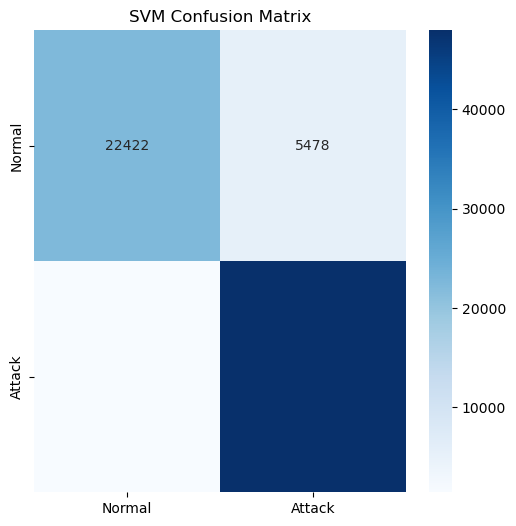


Evaluating Neural Network...

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     27900
           1       0.96      0.93      0.95     49402

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.93      0.93     77302



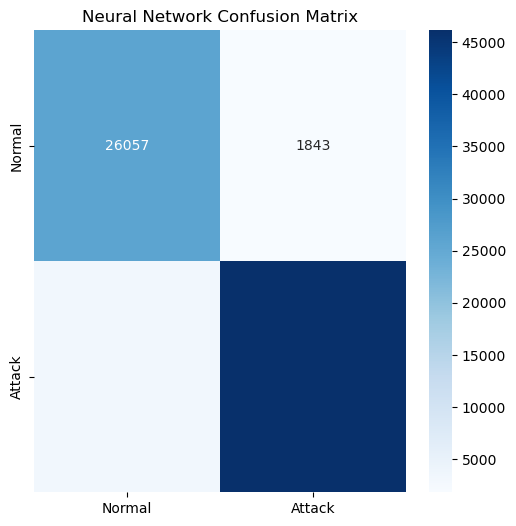

In [54]:
print("\n=== Explicit Evaluation ===")
for name in ["SVM", "Neural Network"]:
    if name in models:
        print(f"\nEvaluating {name}...")
        evaluate_model(models[name], X_test_scaled, y_test, name)
    else:
        print(f"⚠️ {name} not found in trained models!")

## 6. Model Evaluation


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     27900
           1       0.96      0.95      0.96     49402

    accuracy                           0.94     77302
   macro avg       0.94      0.94      0.94     77302
weighted avg       0.94      0.94      0.94     77302



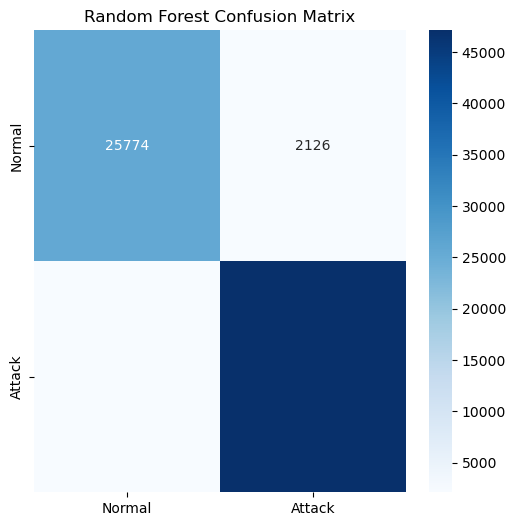


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87     27900
           1       0.90      0.97      0.93     49402

    accuracy                           0.91     77302
   macro avg       0.92      0.89      0.90     77302
weighted avg       0.91      0.91      0.91     77302



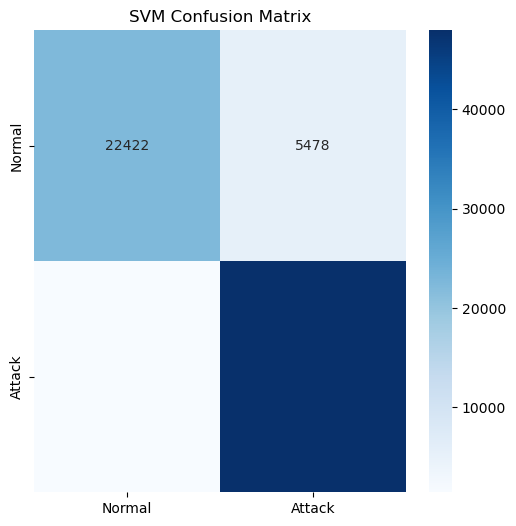


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     27900
           1       0.96      0.93      0.95     49402

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.93      0.93     77302



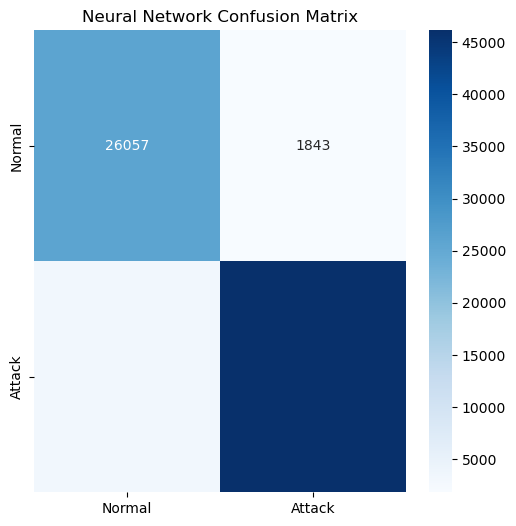


Model Comparison:


{'Random Forest': {'Accuracy': 0.9429380869835192,
  'Precision': 0.956826350953435,
  'Recall': 0.9537468118699648,
  'F1-Score': 0.9552840995488874},
 'SVM': {'Accuracy': 0.910584460945383,
  'Precision': 0.8975040227519365,
  'Recall': 0.9709728351078903,
  'F1-Score': 0.9327940261356564},
 'Neural Network': {'Accuracy': 0.9339861840573336,
  'Precision': 0.9615921642179848,
  'Recall': 0.9340107687947856,
  'F1-Score': 0.9476008091429041}}

In [55]:
# %%
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Attack'],
                yticklabels=['Normal', 'Attack'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    return metrics

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test_scaled, y_test, name)

print("\nModel Comparison:")
pd.DataFrame(results).T
display(results)

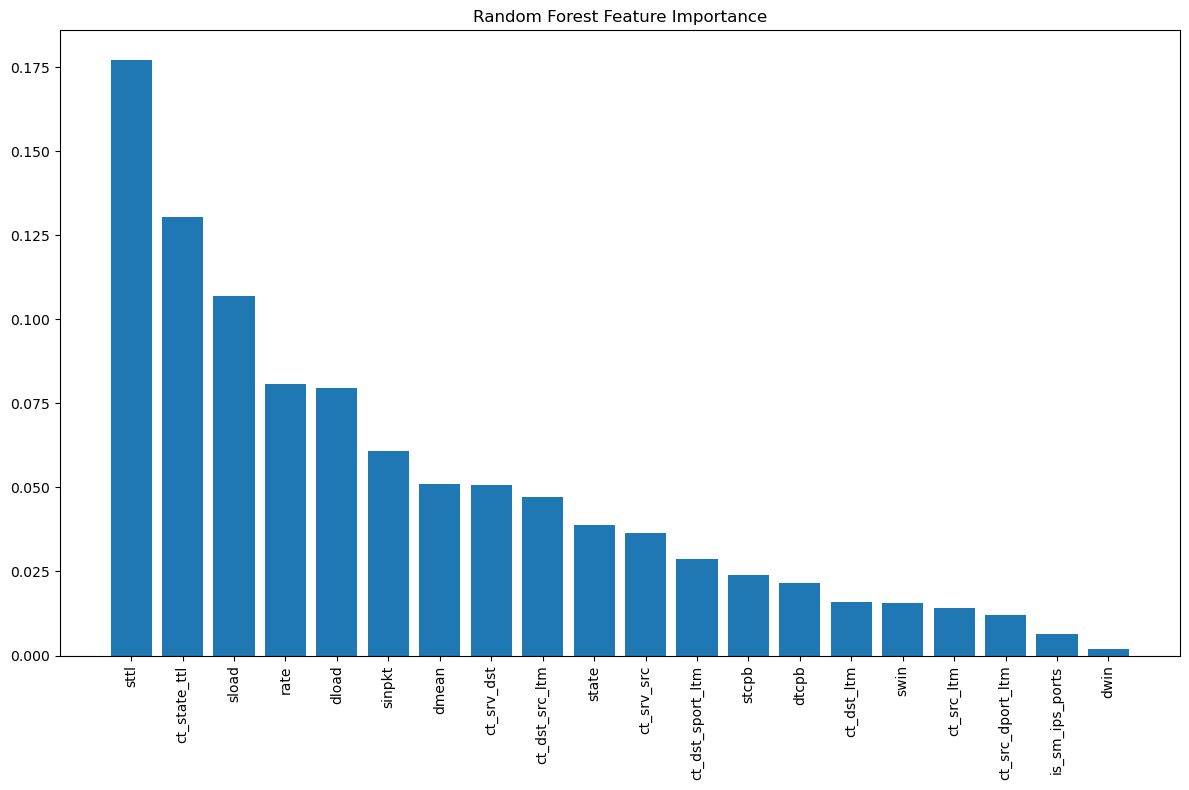

In [56]:
# Feature importance for Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title("Random Forest Feature Importance")
    plt.bar(range(len(selected_features)), importances[indices], align='center')
    plt.xticks(range(len(selected_features)), 
               [selected_features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [58]:
# Save the best performing model (Random Forest in this case)
best_model = models['Random Forest']
joblib.dump(best_model, 'best_cyber_threat_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

print("\nSaved:")
print("- best_cyber_threat_model.pkl: Trained model")
print("- scaler.pkl: Feature scaler")
print("- selected_features.pkl: Selected feature names")


Saved:
- best_cyber_threat_model.pkl: Trained model
- scaler.pkl: Feature scaler
- selected_features.pkl: Selected feature names


In [60]:
"""
## 9. Sample Prediction
"""
loaded_model = joblib.load('best_cyber_threat_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_features = joblib.load('selected_features.pkl')

# Get the first test sample (pre-scaling)
X_test_df = pd.DataFrame(X_test, columns=selected_features)  # Recreate DataFrame
sample_data = X_test_df.iloc[0:1][loaded_features]

# Scale and predict
sample_data_scaled = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(sample_data_scaled)

# Get the actual label (y_test is a pandas Series)
actual_label = y_test.iloc[0]

print("\nSample Prediction:")
print(f"Selected Features: {list(loaded_features)}")
print(f"Feature Values: {sample_data.values[0]}")
print(f"Predicted: {'Attack' if prediction[0] == 1 else 'Normal'}")
print(f"Actual: {'Attack' if actual_label == 1 else 'Normal'}")


Sample Prediction:
Selected Features: ['state', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']
Feature Values: [4.00000000e+00 6.17770752e+03 3.10000000e+01 2.06203988e+06
 2.61093575e+06 3.45381000e-01 2.55000000e+02 4.19773147e+09
 4.19805237e+09 2.55000000e+02 9.90000000e+01 1.00000000e+00
 0.00000000e+00 3.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 2.00000000e+00 6.00000000e+00 0.00000000e+00]
Predicted: Normal
Actual: Normal
